In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
from glob import glob
from PIL import Image

In [5]:
annot = pd.read_parquet('../input/textocr-text-extraction-from-images-dataset/annot.parquet')
imgs = pd.read_parquet('../input/textocr-text-extraction-from-images-dataset/img.parquet')
img_fns = glob('../input/textocr-text-extraction-from-images-dataset/train_val_images/train_images/*')

In [6]:
annot.head()

,id,image_id,bbox,utf8_string,points,area
0,a4ea732cd3d5948a_1,a4ea732cd3d5948a,"[525.83, 3.4, 197.64, 33.94]",Performance,"[525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525...",6707.90
1,a4ea732cd3d5948a_2,a4ea732cd3d5948a,"[534.67, 64.68, 91.22, 38.19]",Sport,"[535.73, 64.68, 623.41, 67.51, 625.89, 102.87,...",3483.69
2,a4ea732cd3d5948a_3,a4ea732cd3d5948a,"[626.95, 63.62, 96.52, 31.82]",Watch,"[626.95, 63.62, 721.7, 63.62, 723.47, 95.44, 6...",3071.27
3,a4ea732cd3d5948a_4,a4ea732cd3d5948a,"[577.4, 141.87, 147.13, 43.1]",...period.,"[580.02, 143.61, 724.53, 141.87, 723.66, 184.9...",6341.30
4,a4ea732cd3d5948a_5,a4ea732cd3d5948a,"[391.03, 163.9, 60.82, 38.65]",.,"[395.2, 163.9, 451.85, 191.94, 445.59, 202.55,...",2350.69


In [7]:
imgs.head()

,id,width,height,set,file_name
0,a4ea732cd3d5948a,840,1024,train,train/a4ea732cd3d5948a.jpg
1,4bf43a7b2a898044,1024,683,train,train/4bf43a7b2a898044.jpg
2,1b55b309b0f50d02,1024,683,train,train/1b55b309b0f50d02.jpg
3,00c359f294f7dcd9,1024,680,train,train/00c359f294f7dcd9.jpg
4,04b5a37f762b0f51,768,1024,train,train/04b5a37f762b0f51.jpg


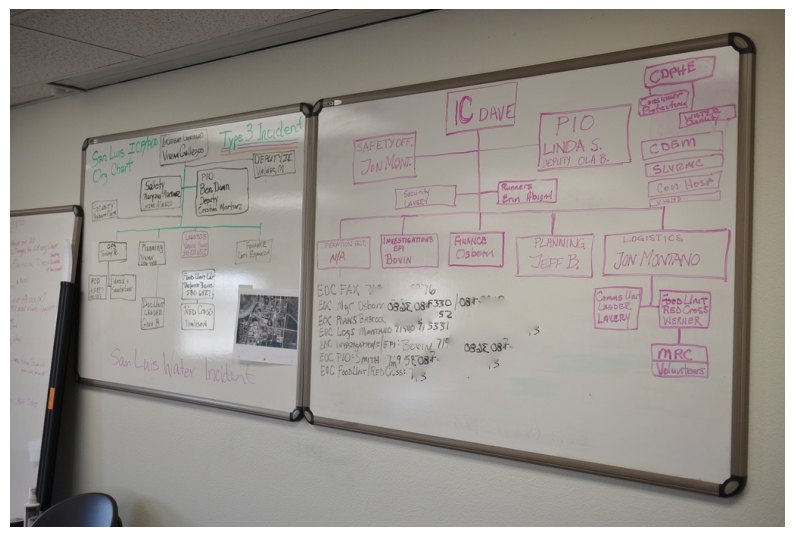

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(img_fns[15]))
ax.axis('off')
plt.show()

In [ ]:
image_id = img_fns[0].split('/')[-1].split('.')[0]
annot.query('image_id == @image_id')

In [ ]:
img_fns[0].split("/")[-1].split(".")[0]

In [ ]:
!pip install scipy==1.8.0

In [ ]:
import pytesseract

# Example call
print(pytesseract.image_to_string(img_fns[14], lang='eng'))

In [1]:
!pip install keras-ocr -q

In [9]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 3s 3s/step


In [21]:
results = pipeline.recognize([img_fns[16]])

1/1 [==============================] - 1s 833ms/step


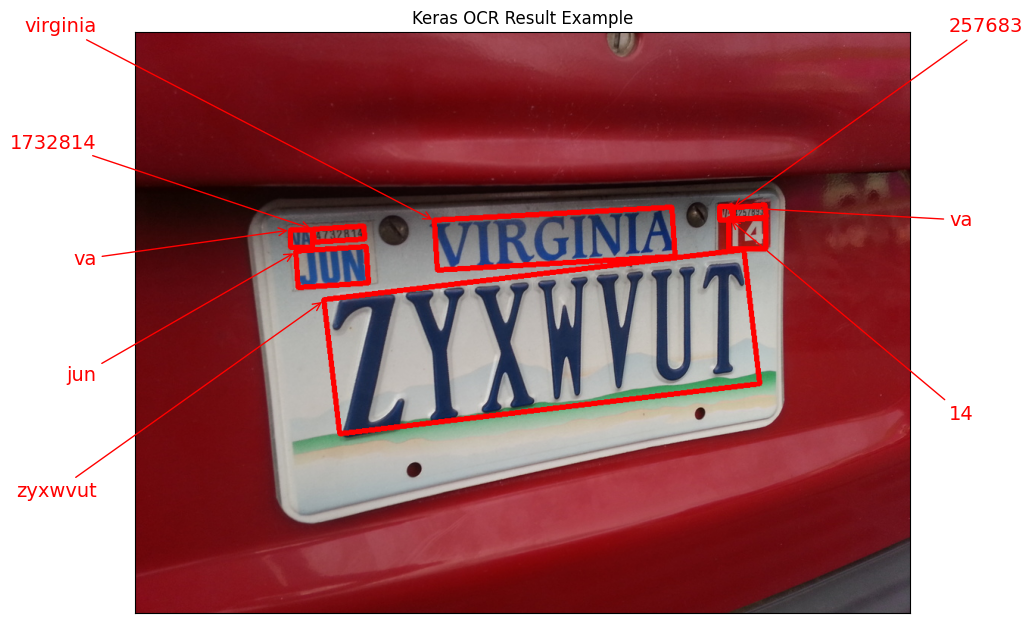

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(plt.imread(img_fns[16]), results[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

In [ ]:
import easyocr

reader = easyocr.Reader(['en'], gpu = True)

In [ ]:
results = reader.readtext(img_fns[11])